In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [59]:
# Load experimental results from files.

from pathlib import Path
import re
import yaml
from yaml import SafeLoader

EXP_PATH = "/home/hazrael/GitRepositories/storalloc/storalloc-gitlab/simulation/results"
EXP_NAME = "exp__09-Dec-22_16-43"
EXP_FILE = "exp__split_200G_worst_case_infra64TBBB_multi_node_multi_disk_IOJobs.yml"

full_path = f"{EXP_PATH}/{EXP_NAME}/{EXP_FILE}"
print(f"Using file: {full_path}")

exp_data = []

infra_pattern = re.compile(r"infra\d+TB")
system_pattern = re.compile(r"(single|multi)(_[a-z]+){3}")
algo_pattern = re.compile(r"(split_200G)_?(\S+)_infra\d+TBBB")

with open(full_path, "r", encoding="utf-8") as yaml_file:
    exp = yaml.load(yaml_file, Loader=SafeLoader)
    exp["full_name"] = Path(full_path).stem.split('__')[1]
    exp["infra"] = infra_pattern.findall(exp["full_name"])[0]
    exp["system"] = system_pattern.search(exp["full_name"])[0]
    exp["algo"] = algo_pattern.search(exp['full_name'])[2]
    exp_data.append(exp)

Using file: /home/hazrael/GitRepositories/storalloc/storalloc-gitlab/simulation/results/exp__09-Dec-22_16-43/exp__split_200G_worst_case_infra64TBBB_multi_node_multi_disk_IOJobs.yml


In [60]:
# Load them (almost) unprocessed into a DataFrame

import pandas as pd

df_data = pd.DataFrame(exp_data)
df_data

,alloc_delayed_requests_count,alloc_split_requests_count,alloc_split_requests_duration,alloc_split_requests_gb,delayed_requests_count,failed_requests_count,failed_split_requests_count,max_concurrent_allocations,nodes,refused_delayed_requests_count,...,sim_last_ts,split_requests_count,split_threshold_gb,tt_allocated_gb,tt_deallocated_gb,tt_delay_time_minutes,full_name,infra,system,algo
0,0,856,13770130.0,1498303.0,0,17,17,206,"[{'disks': [{'capacity': 1600, 'id': 0, 'last_...",0,...,1609446938,873,200,1585789.0,1585789.0,0,split_200G_worst_case_infra64TBBB_multi_node_m...,infra64TB,multi_node_multi_disk,worst_case


In [61]:
# DATASET POST-PROCESSING
# Compute some means (per node / disk) extracted from the "nodes" column 
# and add them as new columns in the original dataset

# Percentage of the total requested capacity that was successfully allocated during a run
# of the simulation.
tt_allocated_percent = []

# Not useful in this case, with a single file
for idx, row in df_data.iterrows():
    
    ################################################################################
    ####  /!\ Hardcoded value for total requested capacity for the IOJobs.yaml file
    ####      UPDATE WHEN NECESSARY (other datasets...)
    ####
    tt_allocated_percent.append(int((row["tt_allocated_gb"] * 100) / 1607838))
    ################################################################################
    
df_data["tt_allocated_percent"] = tt_allocated_percent

rows, cols = df_data.shape
if cols < 30:
     raise ValueError("That's weird, there should be more columns now (about 30)")
        
df_data.head()

,alloc_delayed_requests_count,alloc_split_requests_count,alloc_split_requests_duration,alloc_split_requests_gb,delayed_requests_count,failed_requests_count,failed_split_requests_count,max_concurrent_allocations,nodes,refused_delayed_requests_count,...,split_requests_count,split_threshold_gb,tt_allocated_gb,tt_deallocated_gb,tt_delay_time_minutes,full_name,infra,system,algo,tt_allocated_percent
0,0,856,13770130.0,1498303.0,0,17,17,206,"[{'disks': [{'capacity': 1600, 'id': 0, 'last_...",0,...,873,200,1585789.0,1585789.0,0,split_200G_worst_case_infra64TBBB_multi_node_m...,infra64TB,multi_node_multi_disk,worst_case,98


In [62]:
df_data.describe()

,alloc_delayed_requests_count,alloc_split_requests_count,alloc_split_requests_duration,alloc_split_requests_gb,delayed_requests_count,failed_requests_count,failed_split_requests_count,max_concurrent_allocations,refused_delayed_requests_count,refused_requests_count,...,requests_count,sim_duration,sim_first_ts,sim_last_ts,split_requests_count,split_threshold_gb,tt_allocated_gb,tt_deallocated_gb,tt_delay_time_minutes,tt_allocated_percent
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0
25%,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0
50%,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0
75%,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0
max,0.0,856.0,13770130.0,1498303.0,0.0,17.0,17.0,206.0,0.0,0.0,...,31160.0,31515560.0,1.577931e+09,1.609447e+09,873.0,200.0,1585789.0,1585789.0,0.0,98.0


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_theme = {
    "context": "paper",            
    "palette": "Paired", 
    "style": "whitegrid", 
    "rc": {
        "axes.spines.right":False, 
        "axes.spines.top": False,
    }
}

categorical_theme_2 = {
    "context": "paper",            
    "palette": "husl", 
    "style": "whitegrid", 
    "rc": {
        "axes.spines.right":False, 
        "axes.spines.top": False,
    }
}

categorical_theme_disk = {
    "context": "paper",            
    "palette": "colorblind", 
    "style": "whitegrid", 
}

In [64]:
print(f"### SUMMARY FOR {EXP_FILE} ###\n\n")

print(f"# Simulation duration (internal time): {df_data['sim_duration'].values[0] / 60 / 60 / 24} days")
print(f"   - First recorded TS in simulation: {df_data['sim_first_ts'].values[0]}")
print(f"   - Last recorded TS in simulation: {df_data['sim_last_ts'].values[0]}")
if df_data['sim_first_ts'].values[0] >= df_data['sim_last_ts'].values[0]:
    print("   # ERROR: First recorded TS is >= to last recorded")


print(f"# Total number of requests: {df_data['requests_count'].values[0]}")
print(f"# Max concurrent allocations considering all nodes at once (whole simulation): {df_data['max_concurrent_allocations'].values[0]}")
#print(f"# Max node utilisation  (%, whole simulation): {df_data['max_node_utilisation'].values[0]}%")
print(f"# Total allocated volume (GB, whole simulation): {df_data['tt_allocated_gb'].values[0]/1000/1000:0.4} PB")
print(f"# Total allocated volume (% of requested, whole simulation): {df_data['tt_allocated_percent'].values[0]}%")
if int(df_data['tt_allocated_gb'].values[0]) != int(df_data['tt_deallocated_gb'].values[0]):
    print("# ERROR : allocated != from deallocated volume")

print()

print(f"# Total number of minutes of delay: {df_data['tt_delay_time_minutes'].values[0]}")
if df_data['retries_allowed'].values[0] == "no" and df_data['tt_delay_time_minutes'].values[0] > 0:
    print("# ERROR: We accounted for minutes of delay, but 'retry' was not allowed in this run")

print()

print(f"# Number of refused requests: {df_data['refused_requests_count'].values[0]}")
print(f"   # Out of which there are >{df_data['refused_split_requests_count'].values[0]}< refused split requests")
    
print()

print(f"# Configured split threshold: {df_data['split_threshold_gb'].values[0]} GB")
print(f"# Number of split requests: {df_data['split_requests_count'].values[0]}")
print(f"# Number of allocated split requests: {df_data['alloc_split_requests_count'].values[0]}")
print(f"# Number of failed split requests: {df_data['failed_split_requests_count'].values[0]}")
print(f"# Number of refused split requests: {df_data['refused_split_requests_count'].values[0]}")

print()

# Only one row here.
print("# Nodes")
for node in df_data['nodes'].values[0]:
    
    print(f" Node {node['id']}")    
    print(f"  Maximum number of concurrent allocations: {node['max_nb_alloc']}")
    print(f"  Mean number of allocations: {node['mean_nb_alloc']}")
    
    print(f" Disks of node {node['id']}")
    for disk in node['disks']:
        print(f" - Max./Mean cap. {disk['max_cap_utilisation']}%/{disk['max_cap_utilisation']}% ; Max/mean conc. alloc {disk['max_nb_alloc']}/{disk['mean_nb_alloc']}")
    
    print()
#print(f"# Mean number of concurrent allocations per node (whole simulation): {df_data['nodes']['mean_nb_alloc'].values[0]}")
#print(f"# Max number of concurrent allocations on any single node: {df_data['max_node_alloc'].values[0]}")

### SUMMARY FOR exp__split_200G_worst_case_infra64TBBB_multi_node_multi_disk_IOJobs.yml ###


# Simulation duration (internal time): 364.76342592592596 days
   - First recorded TS in simulation: 1577931378
   - Last recorded TS in simulation: 1609446938
# Total number of requests: 31160
# Max concurrent allocations considering all nodes at once (whole simulation): 206
# Total allocated volume (GB, whole simulation): 1.586 PB
# Total allocated volume (% of requested, whole simulation): 98%

# Total number of minutes of delay: 0

# Number of refused requests: 0
   # Out of which there are >0< refused split requests

# Configured split threshold: 200 GB
# Number of split requests: 873
# Number of allocated split requests: 856
# Number of failed split requests: 17
# Number of refused split requests: 0

# Nodes
 Node S-f47948:0
  Maximum number of concurrent allocations: 103
  Mean number of allocations: 2.159
 Disks of node S-f47948:0
 - Max./Mean cap. 100.0%/100.0% ; Max/mean conc. alloc 

In [65]:
# [6] ---  Create a second dataset where each row is a disk (instead of having one simulation per row)

data_by_disk = {
    "run_name": [],
    "node_id": [],
    "disk_id": [],
    "full_disk_id": [],
    "disk_mean_nb_alloc": [],
    "disk_max_nb_alloc": [],
    "disk_mean_cap_percent": [],
    "disk_max_cap_percent": [],
    "disk_capacity": [],
    "infra": [],
    "system": [],
    "algo": []
}

for idx, row in df_data.iterrows():
    for node in row['nodes']:
        for disk in node["disks"]:
            data_by_disk["run_name"].append(row['full_name'])
            data_by_disk["node_id"].append(node['id'])
            data_by_disk["disk_id"].append(disk['id'])
            data_by_disk["full_disk_id"].append(f"{node['id']}:{disk['id']}")
            data_by_disk["disk_mean_nb_alloc"].append(disk['mean_nb_alloc'])
            data_by_disk["disk_max_nb_alloc"].append(disk['max_nb_alloc'])
            data_by_disk["disk_mean_cap_percent"].append(disk['mean_capacity_utilisation'])
            data_by_disk["disk_max_cap_percent"].append(disk['max_cap_utilisation'])
            data_by_disk["disk_capacity"].append(disk['capacity'])
            data_by_disk["infra"].append(row['infra'])
            data_by_disk["system"].append(row['system'])
            data_by_disk["algo"].append(row['algo'])
    
data_by_disk = pd.DataFrame(data_by_disk)
data_by_disk

,run_name,node_id,disk_id,full_disk_id,disk_mean_nb_alloc,disk_max_nb_alloc,disk_mean_cap_percent,disk_max_cap_percent,disk_capacity,infra,system,algo
0,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:0,0,S-f47948:0:0,0.429,20,2.104,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
1,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:0,1,S-f47948:0:1,0.431,20,2.461,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
2,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:0,2,S-f47948:0:2,0.433,20,2.370,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
3,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:0,3,S-f47948:0:3,0.425,24,2.208,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
4,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:0,4,S-f47948:0:4,0.442,25,2.284,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
5,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:1,0,S-f47948:1:0,0.436,24,2.111,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
6,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:1,1,S-f47948:1:1,0.440,20,2.489,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
7,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:1,2,S-f47948:1:2,0.427,20,2.211,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
8,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:1,3,S-f47948:1:3,0.436,20,2.237,100.00,1600,infra64TB,multi_node_multi_disk,worst_case
9,split_200G_worst_case_infra64TBBB_multi_node_m...,S-f47948:1,4,S-f47948:1:4,0.450,20,2.489,100.00,1600,infra64TB,multi_node_multi_disk,worst_case


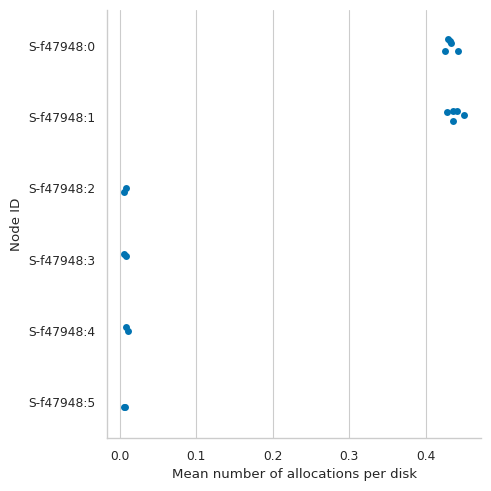

In [66]:
# [7] ---  Mean number of allocations per disk, organized per node ID

sns.set(rc={'figure.figsize':(1,5)})
sns.set_theme(**categorical_theme_disk)

g = sns.catplot(
    data=data_by_disk, kind="strip",
    y="node_id", x="disk_mean_nb_alloc",
)
g.set_axis_labels("Mean number of allocations per disk", "Node ID")

[Text(0, 0.5, 'Node ID'), Text(0.5, 0, 'Mean number of allocations per disk')]

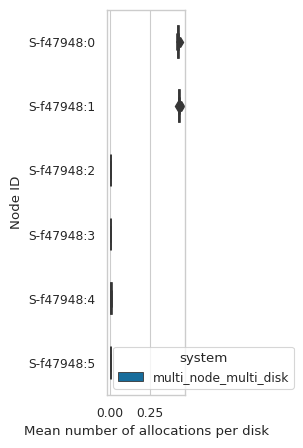

In [67]:
# [8] ---  Same as before, but with box plot

#sns.set(rc={'figure.figsize':(29.7,21)})
#sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(**categorical_theme_disk)


g = sns.boxplot(
    data=data_by_disk,
    y="node_id", x="disk_mean_nb_alloc", hue="system", 
    dodge=True, width=0.5,
)
#g.set(xscale="log")
g.set(ylabel="Node ID", xlabel="Mean number of allocations per disk")

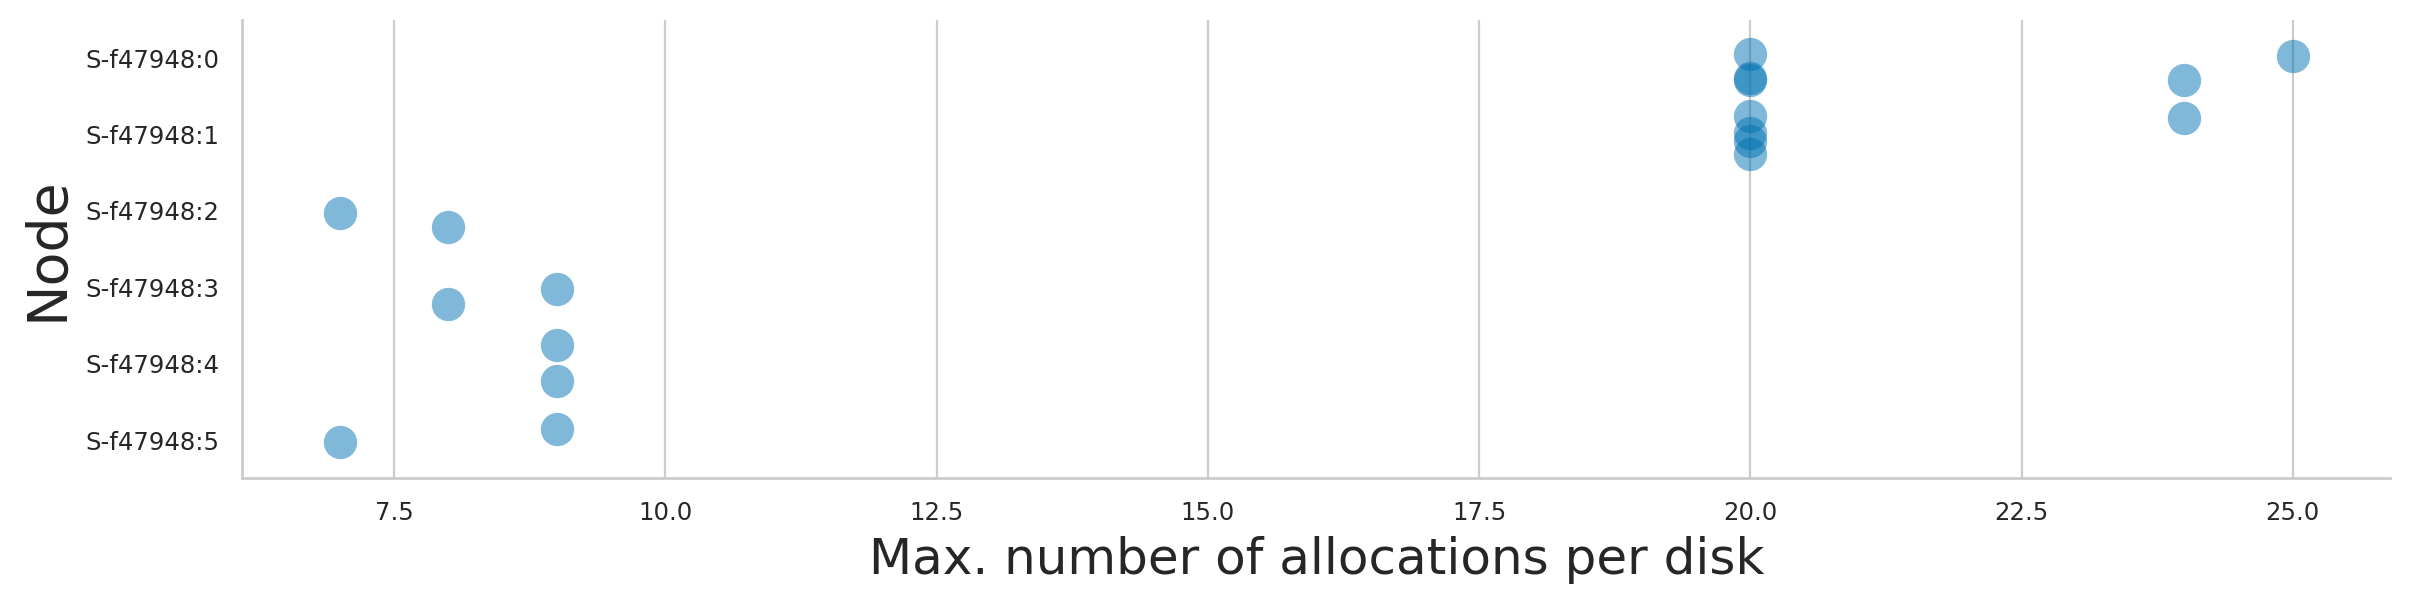

In [98]:
# [10] ---  Max number of allocations per disk, organised by simulation run and infrastructure (1/2)

sns.set(rc={'figure.figsize':(23,5), "figure.dpi":200})

sns.set_theme(**categorical_theme_disk)

g = sns.catplot(
    data=data_by_disk, kind="strip",
    y="node_id", x="disk_max_nb_alloc",
    height=3, aspect=4, jitter=0.3,
    size=12, alpha=.50,
)
g.ax.set_xlabel("Max. number of allocations per disk", fontsize = 18)
g.ax.set_ylabel("Node", fontsize = 20)

plt.savefig("max_alloc_number_per_disk_grouped_by_node.pdf", bbox_inches="tight")

[Text(0, 0.5, 'Algorithm'),
 Text(0.5, 0, 'Max number of allocations per node and disk')]

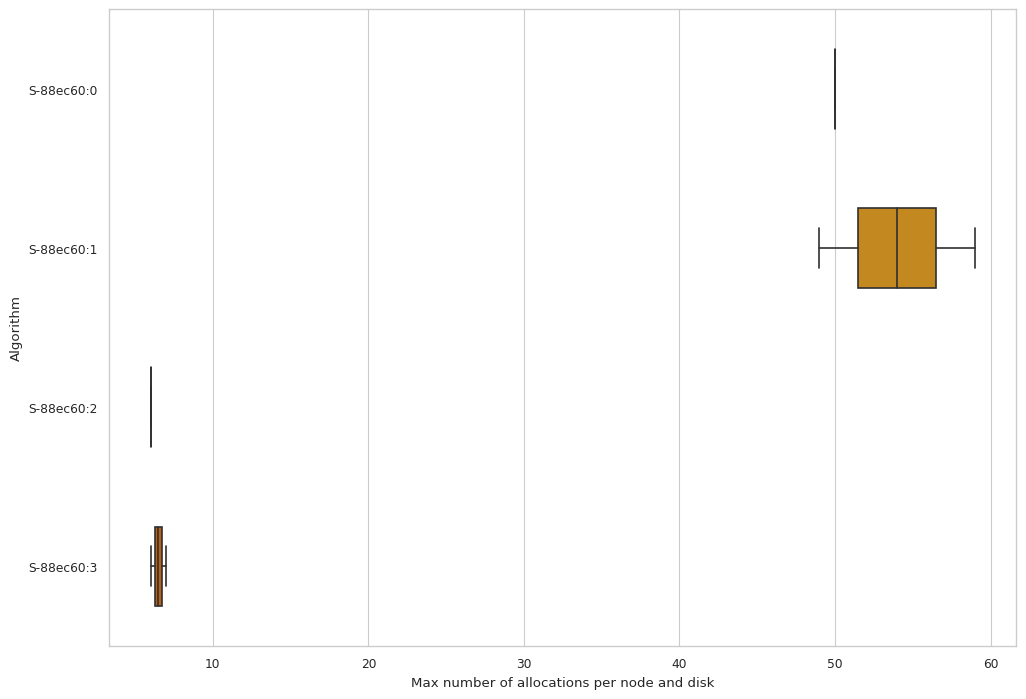

In [14]:
# [11] ---  Max number of allocations per disk, organised by simulation run and infrastructure (2/2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(**categorical_theme_disk)


g = sns.boxplot(
    data=data_by_disk,
    y="node_id", x="disk_max_nb_alloc",
    dodge=True, width=0.5
)
g.set(ylabel="Algorithm", xlabel="Max number of allocations per node and disk")